https://stackoverflow.com/questions/77587951/how-to-fit-a-system-of-odes-with-interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
texp = np.array([0, 5, 9, 18, 28, 38]).reshape(-1, 1)
xexp = np.array([
    [0.24, 0.71, 0.95, 0.26, 0.05, 0.22],
    [0.2, 0.62, 0.95, 0.51, 0.13, 0.05], 
    [0.89, 0.66, 0.95, 0.49, 0.28, 0.05]
])

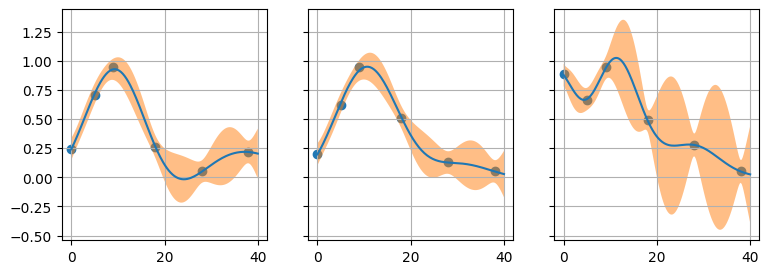

In [6]:
tlin = np.linspace(0, 40, 200).reshape(-1, 1)
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(9,3))

for i in range(3):

    kernel = 1 * RBF(length_scale=1.0)
    model = GaussianProcessRegressor(kernel=kernel, alpha=0.05**2)
    
    model.fit(texp, xexp[i, :])
    xpred, xstd = model.predict(tlin, return_std=True)

    axe = axes[i]
    axe.scatter(texp, xexp[i, :])
    axe.plot(tlin, xpred)
    axe.fill_between(tlin.ravel(), xpred - 1.96 * xstd, xpred + 1.96 * xstd, alpha=0.5)
    axe.grid()